In [18]:
from nbdev import *

In [19]:
%nbdev_hide
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%nbdev_default_export visualization

Cells will be exported to timecluster_extension.visualization,
unless a different module is specified after an export flag: `%nbdev_export special.module`


# Visualization

> Methods to visualize data for the PACMEL minining use case

In [21]:
%nbdev_export
from fastcore.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
%nbdev_hide
from timecluster_extension.utils import *

### Plot multivariate time series from a dataframe

In [23]:
%nbdev_export
@delegates(pd.DataFrame.plot)
def plot_TS(df:pd.core.frame.DataFrame, **kwargs):
    df.plot(subplots=True, **kwargs)
    plt.show()

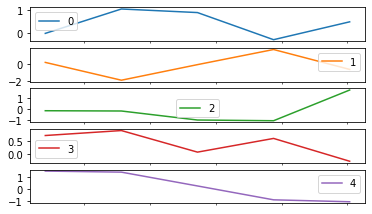

In [24]:
plot_TS(generate_TS_df(5, 5))

In [25]:
%nbdev_export
def plot_validation_ts_ae(prediction:np.array, original:np.array,fig_size = (15,15),anchor = (0, 0.85),window_num = 0):
    # Create the figure
    fig = plt.figure(figsize=(fig_size[0],fig_size[1]))
    # Create the subplot axes
    axes = fig.subplots(nrows=original.shape[2], ncols=1)
    # We iterate over the sensor data and plot both the original and the prediction
    for i,ax in zip(range(original.shape[2]),fig.axes):
        ax.plot(original[window_num,:,i], label='Original Data')
        ax.plot(prediction[window_num,:,i], label='Prediction')
    # Handle the legend configuration and position
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels,bbox_to_anchor=(anchor[0], anchor[1]),loc='upper left')
    return fig

In [26]:
input1 = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
input2 = input1+1


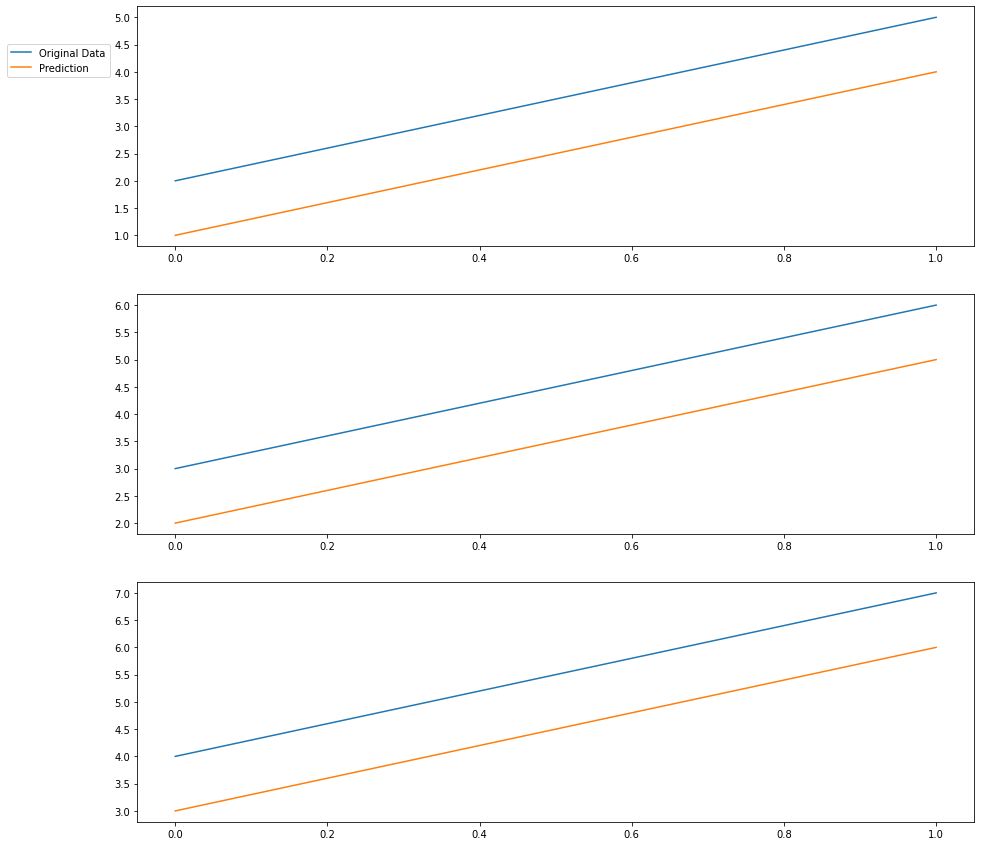

In [27]:
testasd=plot_validation_ts_ae(input1,input2,(15,15),window_num=0)

In [28]:
type(testasd)

matplotlib.figure.Figure